<a href="https://colab.research.google.com/github/LuisMig-code/Fazendo-Previs-es-em-Machine-Learning-usando-o-RFE/blob/main/Fazendo_Previs%C3%B5es_em_Machine_Learning_usando_o_RFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimações de preços com Machine Learning (Classificações)

Voltando um pouco às raízes , *Machine Learning* sempre é associado a vendas, predição de vendas , produção , entre outros . Com diversas aplicações no mundo dos negócios , rapidamente o Aprendizado de Máquinas (na verdade o *Data Science* no geral) virou requisito em muitas empresas.

Hoje pretendo trazer um Modelo de *Machine Learning* que visa fazer previsões do preço de smatphones em uma loja , baseado em seus atributos de hardware para uma loja.

<img src="https://images.pexels.com/photos/3869370/pexels-photo-3869370.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" width=800px>

Hoje , mais do que nunca , temos modelos e algoritimos incríveis que prevêm excelentes resultados 

## Contextualizando

Bob iniciou sua própria empresa de telefonia móvel. Ele quer brigar duramente com grandes empresas como Apple, Samsung etc.

Ele não sabe estimar o preço dos celulares que sua empresa cria. Neste competitivo mercado de telefonia móvel, você não pode simplesmente assumir as coisas. Para resolver esse problema, ele coleta dados de vendas de telefones celulares de várias empresas.

Bob deseja descobrir alguma relação entre os recursos de um telefone móvel (por exemplo: - RAM, memória interna, etc.) e seu preço de venda. Mas ele não é muito bom em aprendizado de máquina. Então ele precisa de sua ajuda para resolver este problema.

Neste problema, você não precisa prever o preço real, mas uma faixa de preço indicando quão alto é o preço

**obs:Texto retirado direto da fonte dos dados**

## Importanto os dados

Os dados ultilizados nesse Notebook foram extraido do Kaggle , você pode ter acesso clicando [aqui](https://www.kaggle.com/iabhishekofficial/mobile-price-classification)

Nosso Conjunto de dados possui 2 arquivos , dados para teste e dados para treino , o primeiro é aquele que usaremos para fazer nosso modelo e medir suas estatísiticas , já o segundo é aquele em que será aplicado definitivamente nosso modelo e será usado por último

Nos dados de treino temos 2000 entradas e 21 colunas , já em nossos dados de teste temos 1000 entradas e 20 colunas

In [23]:
# importar os pacotes necessários

import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.feature_selection import RFE

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [24]:
link_test = 'https://www.dropbox.com/s/fjy6szcbnj04z7p/test.csv?dl=1'
link_train = 'https://www.dropbox.com/s/qmniircx08w782f/train.csv?dl=1'

In [25]:
dados_treino = pd.read_csv(link_train)
dados_test = pd.read_csv(link_test)

## Análise Exploratória

Vamos ver como se comporta nossos dados , sua quantidade e o tipo de variável que temos . Para isso , seria interessente termos os significados das variáveis , como uma espécie de índice

##### Dicionário dos nossos dados:

*   **battery_power**	= Energia total que uma bateria pode armazenar em um tempo medida em mAh
* **blue**	= Tem ou não tem bluetooth 
* **clock_speed**	= velocidade na qual o microprocessador executa as instruções
* **dual_sim**	= Tem ou não suporte a 2 chips
* **fc**	= Megapixels da câmera frontal
* **four_g**	= Tem ou não suporte à 4G
* **int_memory**	= Memória Interna em Gigabytes
* **m_dep**	= Profundidade do celular em cm
* **mobile_wt**	= Peso do celular
* **n_cores**	= Número de núcleos do processador
* **pc**	= Megapixels da câmera primária
* **px_height**	= Altura de resolução de pixels
* **px_width**	= Largura de resolução de pixels
* **ram**	= Memória RAM em megabytes
* **sc_h** =	Altura da tela do celular em cm
* **sc_w**	= Largura da tela do celular em cm
* **talk_time** =	o tempo mais longo que uma única carga da bateria dura quando você fala no celular
* **three_g**	= Tem ou não suporte à 3G
* **touch_screen** = Tem ou não Touch Screen 	
* **wifi**	= Tem ou não suporte à Wifi
* **price_range** = faixa de preço , esta é a **variável alvo** com valor de 0 (custo baixo), 1 (custo médio), 2 (custo alto) e 3 (custo muito alto).


In [26]:
# dimensões do dataframe
print("Em nosso Dataframe de Treino temos:")
print("Linhas : {}".format(dados_treino.shape[0]))
print("Colunas : {}".format(dados_treino.shape[1]))

Em nosso Dataframe de Treino temos:
Linhas : 2000
Colunas : 21


In [27]:
# ver tipo das variáveis
dados_treino.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

Um fato que já podemos destacar é que **não** possuímos variáveis que sejam textos (strings) , isso é muito importante de se ressaltar , pois influência na escolha do nosso modelo

In [28]:
# ver se há valores nulos:
dados_treino.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Assim como também não possuímos valores nulos em nenhum de nossos dados , evitando assim possíveis erros de nosso modelo

In [29]:
# Verificando a correlação entre os dados
dados_treino.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


Neste último podemos verificar a correlação entre nossos dados , entretanto , como possuímos muitas colunas a interpretação de nossos dados pode ser comprometida , para isso o ideal é uma análise gráfica.

## Análises gráficas

Vamos começar com um gráfico de calor (heatmap) para verificar a correlação presente em nossas variáveis e como podem se comportar na hora da produção de nosso modelo

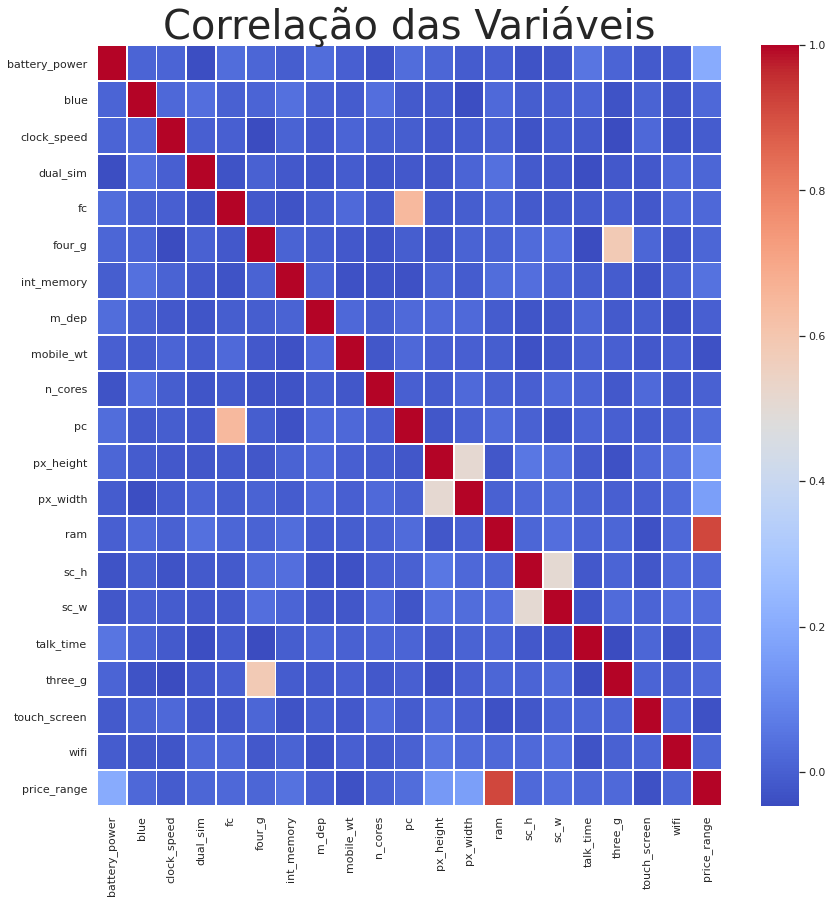

In [30]:
# plotando o heatmap
fig, ax = plt.subplots(figsize=(14,14))
ax = sns.heatmap(dados_treino.corr(), cmap='coolwarm', ax=ax , linewidths=.9)
ax.set_title("Correlação das Variáveis" , fontsize = 40 , loc="center")
ax = ax
plt.show()

Como podemos observar , a variável que nos interessa é a "*price_range*" , que no geral não possui muitas relações com todas as variáveis , mas ainda há com algumas , como por exemplo "*battery_power*" , mas isso analisaremos mais profundamente posteriormente 

Gostiaria também de visualizar a distribuição da nossa variável alvo , a faixa de preço dos celulares

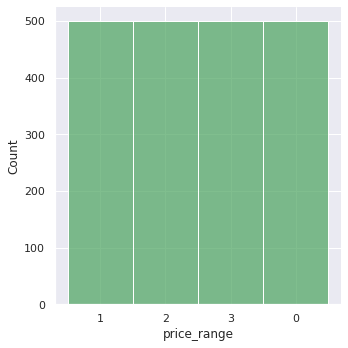

In [31]:
# plotar distplot do preço
ax = sns.displot(dados_treino.price_range.astype(str) , color = 'g')
ax=ax

Como podemos ver , em nosso dataset temos número de entradas iguais para cada "*range*" de preço , ou seja , estão uniformemente distribuidos . Mas e nossas *features* , ou seja as nossa variáveis do eixo X , será que estão bem distribuídas? será que não existem *outliers* em nossos dados? vamos verificar agora! 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


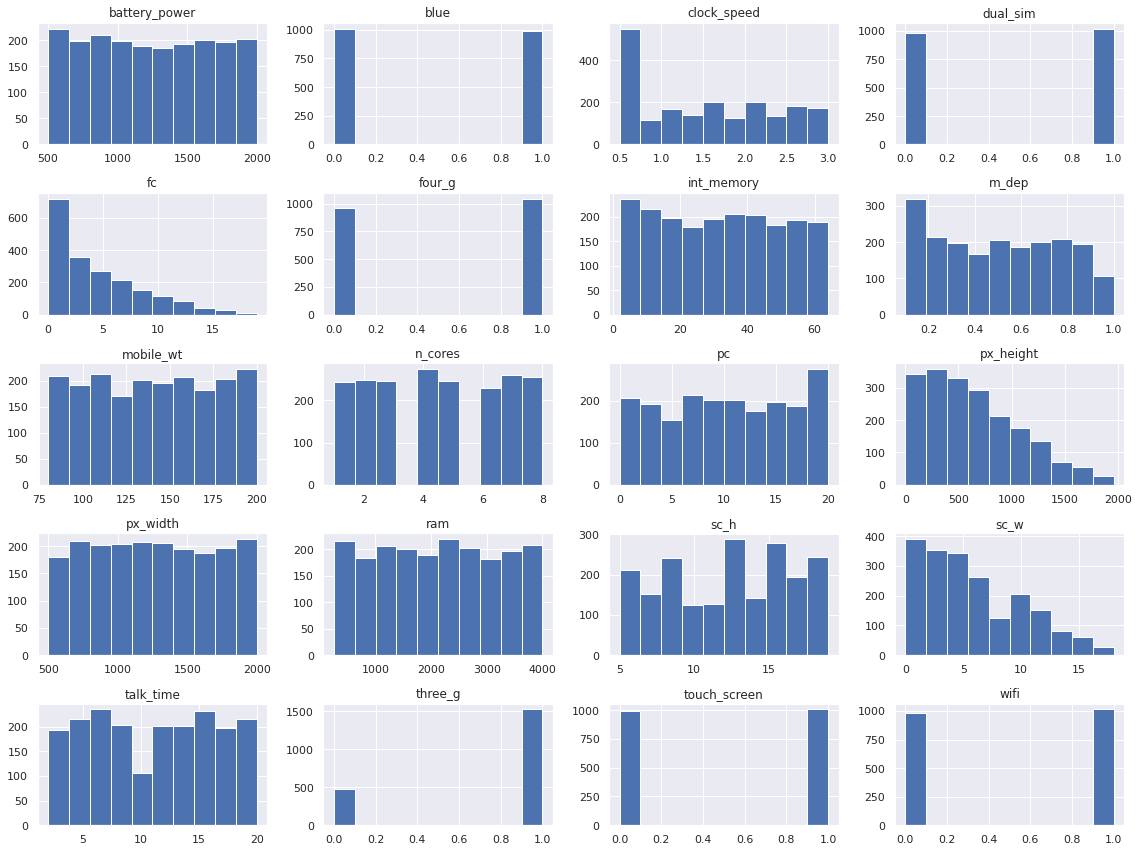

In [32]:
# plotar o histograma das features
fix, ax = plt.subplots(figsize=(16,12))
dados_treino.drop('price_range', axis=1).hist(ax=ax,)
plt.tight_layout()
ax=ax

Com esse gráfico podemos perceber que as nossas *features* se organizam de forma bem uniforme , podemos perceber que não existem outliers notáveis em nossas distribuições , agora estamos preparados para iniciar nosso modelo



---



## Machine Learning



O que estamos fazendo em nossa análise é criar um classificador para nos dizer qual o "*price_range*" , para tal vamos usar 3 classificadores e ver qual se comporta melhor e faz mais sentido para nossa análise, são eles:


1.   Logistic Regression
2.   Random Forest Classifier
3.   SVM

Para cada um deles irei fazer uma breve explicação e dizer qual será usado em nossa análise. Além disso , a fim de tornar nosso modelo mais rápido e mais leve irei usar o RFE - Recursive Feature Elimination ou Eliminação de Característica Recursiva - o nome é um pouco estranho , mas mais adiante irei explicá-lo e mostrar como é uma excelente opção para se implantar em modelos



#### Dividindo nossos dados

é importante que saibamos que nossos dados devem ser dividido em dados de treino e dados de teste , tal como devemos escalá-los , para assim podermos ter uma alta precisão em nosso modelo

In [33]:
# separar as variáveis independentes e variável alvo
X = dados_treino.drop(['price_range'], axis=1)
y = dados_treino['price_range']

# dividir o dataset entre treino e teste
X_treino, X_test, y_treino, y_test = train_test_split(X, y, test_size=0.3,stratify = y,shuffle=True,random_state=10)

# padronizar as colunas numéricas
X_treino = StandardScaler().fit_transform(X_treino)
X_test = StandardScaler().fit_transform(X_test)

# label encoder na variável alvo
y_treino = LabelEncoder().fit_transform(y_treino)
y_test = LabelEncoder().fit_transform(y_test)

### Logistic Regression

In [34]:
# automatizando o modelo
def modelo_show(modelo , X_treino , y_treino , X_test , y_test):
  modelo.fit(X_treino , y_treino)
  pred = modelo.predict(X_test)
  acuracia = accuracy_score(y_test,pred)

  print("A Acurácia foi média foi de:" , acuracia)
  print(classification_report(y_test, pred))

De maneira resumida , a Regressão Logísitica é usada para tomadas de decisões em forma de dados Binários , ou seja , partindo de um dataset em que nossas *features* (ou variáveis independentes X) são dados numéricos , podemos prever se a variável alvo (Y) será 1(True) ou 0(False) , por exemplo.

Já antecipo , A Regressão Logística não será usada , visto que , como explicado acima , ela não se encaixa em nossos critérios . Estamos prevendo uma faixe de preço que vai de 0 à 3 , portanto não sendo binário , mas mesmo assim irei usá-la para mostrar algo interessante.

In [35]:
modelo = LogisticRegression(random_state=10)
modelo_show(modelo , X_treino , y_treino , X_test , y_test)

A Acurácia foi média foi de: 0.97
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       150
           1       0.95      0.97      0.96       150
           2       0.96      0.95      0.95       150
           3       0.97      0.99      0.98       150

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



Como podemos ver , obtivemos uma alta taxa de precisão , isso que dizer que nosso modelo é bom? né? NÃO . Apesar de um bom desempenho , é incorrento e incoerente usá-lo , o que podemos ter tido neste caso foi pura sorte , caso alteremos nosso *random_state* para outro valor podemos ter resultado ligeiramente diferentes , ou seja , não nos serve de forma alguma este modelo

### Random Forest Classifier

O RFC ou Random Forest Classifier é um dos melhores algorítimos para se usar , isso por que sua estrutura permite que ele seja usado tanto para Classificação quanto para Regressão , sendo fundamental em muitas análises , porém muito genérico , mas ainda assim possui alta taxa de acertividade.

"*Uma floresta é composta por árvores. Diz-se que quanto mais árvores tem, mais robusta é a floresta. Florestas aleatórias criam árvores de decisão em amostras de dados selecionadas aleatoriamente, obtém previsões de cada árvore e seleciona a melhor solução por meio de votação. Também fornece um bom indicador da importância do recurso*" - [fonte](https://massivefile.com/randomforestclassifier/)

Em decorrência de ser uma floresta e não só uma árvore (como funciona o Decision Tree Classifier) podemos ter mais precisão e maiores ultilidades neste algorítimo

In [72]:
modelo_random_forest_classifier = RandomForestClassifier(random_state=10)
modelo_show(modelo_random_forest_classifier , X_treino , y_treino , X_test , y_test)

A Acurácia foi média foi de: 0.25
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       150
           1       0.00      0.00      0.00       150
           2       0.00      0.00      0.00       150
           3       0.25      1.00      0.40       150

    accuracy                           0.25       600
   macro avg       0.06      0.25      0.10       600
weighted avg       0.06      0.25      0.10       600



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Com o RFC obtivemos uma precisão menor , porém usando um algorítimo correto . Mas não será só isso , é importante que saibamos que este resultado pode ser melhorado , para isso usaremos o RFE.

#### RFE (Recursive Feature Elimination)

Exercício de imaginação....

imagine que em nossos dados não tenhamos apenas 20 colunas de *features* mas sim 2000 , evidentemente isso é muito . Agora imagine para nosso modelo de predição rodar cada coluna e difinir a sua "participação" na definição da variável Y? como assim? 

Lembra do nosso *Heatmap* , ou nosso gráfico de correlação? se você voltar lá agora vai perceber que existem variáveis que não alteram em nada nosso *price_range* , isso por que não tem relação! Voltando ao exemplo acima , imagine se pudéssemos falar para nosso Modelo o seguinte : "Bem , caro modelo , existem 2000 *features* , mas eu vou te dizer logo quais dessas 2000 você deverá usar e lhe poupar um certo tempo e processamento" . Assim funciona o RFE, vamos implatar ele agora:

In [69]:
modelo_random_forest_classifier = RandomForestClassifier(random_state=10)

o RFE usa um modelo já feito como primeiro parâmetro , depois ele necessita que o usuário passe para ele quantas *features* devem ser escolhidas , ou seja , das 20 *features* que temos , vamos pedir ao modelo que selecione apenas 6 que mais tenham relação (ou influênciam diretamente) a variável alvo(Y) , em ordem crescente

In [70]:
modelo_rfe = RFE(modelo_random_forest_classifier , n_features_to_select= 6)

In [71]:
modelo_show(modelo_rfe , X_treino , y_treino , X_test , y_test)

A Acurácia foi média foi de: 0.25
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       150
           1       0.00      0.00      0.00       150
           2       0.00      0.00      0.00       150
           3       0.25      1.00      0.40       150

    accuracy                           0.25       600
   macro avg       0.06      0.25      0.10       600
weighted avg       0.06      0.25      0.10       600



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Com isso já obitivemos um salto de precisão e velocidade de processamento , como dito anteriormente , o RFC é genérico e quanto mais claro fores as ordens para ele , melhores resultados obteremos , agora nosso modelo não precisará se preocupar em "estudar" 20 variáveis X e pode se "concentrar" apenas em 6 , e a partir daí buscar melhores resultados.

Seria interessantes que soubéssemos quais variáveis são elas

In [40]:
print("As colunas mais importantes são:")
colunas = []
for coluna in dados_treino.iloc[:,:-1].iloc[:, modelo_rfe.support_].head().columns:
  colunas.append(coluna)
  print("-",coluna)

As colunas mais importantes são:
- battery_power
- int_memory
- mobile_wt
- px_height
- px_width
- ram


Dessa forma podemos saber quais colunas mais alteram no preço do celular

### SVM

Assim como a Regressão Logística, o SVM tenta dividir nossos dados , não necessáriamente de forma binária , mas em um hipeplano , podendo ser de qualquer tipo , assim como na imagem abaixo:

<img src="https://minerandodados.com.br/wp-content/uploads/2017/12/hiperplano.jpg"> [fonte](https://minerandodados.com.br/famoso-svm/)

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_0011.png"> [fonte](https://scikit-learn.org/stable/modules/svm.html)


Para isso ele traça uma linha, buscando uma equação , que os divide.

Para nosso caso não é tão pertinente usá-lo , tanto pelo fato já citado (ele não serviria para classificações com mais de 3 resultados) , quanto pelo de não suportar o RFE

In [41]:
modelo = svm.SVC()
modelo_show(modelo , X_treino , y_treino , X_test , y_test)

A Acurácia foi média foi de: 0.865
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       150
           1       0.80      0.79      0.80       150
           2       0.80      0.83      0.81       150
           3       0.94      0.93      0.93       150

    accuracy                           0.86       600
   macro avg       0.87      0.86      0.87       600
weighted avg       0.87      0.86      0.87       600



Apesar de ter um bom desemprenho , o RFC ainda é melhor , possui uma média melhor , quando combinado com o RFE

## Conclusões

Testamos diversos algorítimos que pudessem nos ajudar em nossa análise , o que nos pareceu mais promissor foi o **Random Forest Classifier** , que , quando unido ao RFE se tornou ainda melhor , optmizando nossos resultados , aumentando nossa precisão e velocidade do modelo.